In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz
import csv
import time

%matplotlib inline

In [2]:
filename='/data/eolson/SOG/datacomp/data_for_plotting.csv'
ii=0
year=[]
day=[]
sec=[]
hrsince=[]
no3=[]
si=[]
dia=[]
myri=[]
flag=[]
for line in open(filename,'rt'):
    if ii==0:
        ii+=1
    else:
        line = line.strip()
        data=re.split('\s+',line)
        year.append(int(data[0]))
        day.append(int(data[1]))
        sec.append(float(data[2]))
        hrsince.append(float(data[3]))
        no3.append(float(data[4]))
        si.append(float(data[5]))
        dia.append(float(data[6]))
        myri.append(float(data[7]))
        flag.append(float(data[8]))
dates=[dt.datetime(y,1,1)+dt.timedelta(d-1) for y, d in zip(year,day)]

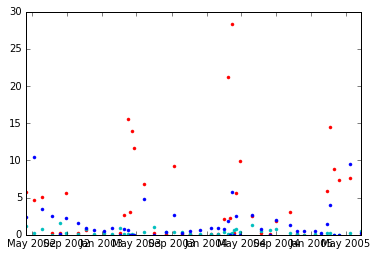

In [3]:
plt.plot(dates,dia,'r.')
plt.plot(dates,myri,'c.')
plt.plot(dates,flag,'b.')

In [4]:
def intvals(z,var):
    delz=z[1:]-z[0:-1]
    varint=np.sum(0.5*(var[1:,:]+var[0:-1,:])*np.tile(delz,(np.shape(var)[1],1)).T,0)
    return(varint)

In [5]:
filename='/data/eolson/SOG/SOG-runs/run_5yrBase/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=82)

# Timestamp in matplotlib time
dt_num = dts.date2num(dt.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary

mtimes=[]
for index, chunk in enumerate(data):
    #print(index)
    #print(np.shape(chunk))
    mtimes.append(dts.num2date(dt_num + index*float(interval), tz=pytz.timezone('UTC')))
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
        

In [6]:
z=da[:,0,0];
DiatBase=da[:,4,:] # umol N / m^2
MyriBase=da[:,5,:] # umol N / m^2
NanoBase=da[:,6,:] # umol N / m^2
MicZBase=da[:,7,:] # umol N / m^2
nitrateBase=da[:,8,:] # umol N / m^2
ammBase=da[:,9,:] # umol N / m^2
SiBase=da[:,10,:] # umol Si / m^2
print(DiatBase.shape)

(82, 1379)


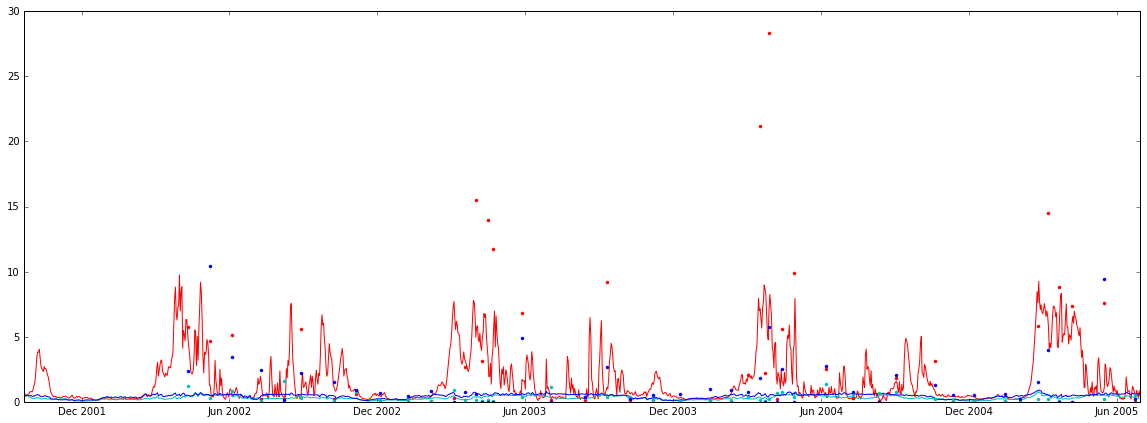

In [7]:
fig, axs = plt.subplots(1,1,figsize=(20,7))
pl0=axs.plot(mtimes,DiatBase[0,:],color='r')
pl0=axs.plot(mtimes,MyriBase[0,:],color='c')
pl0=axs.plot(mtimes,NanoBase[0,:],color='b')
plt.plot(dates,dia,'r.')
plt.plot(dates,myri,'c.')
plt.plot(dates,flag,'b.')


In [8]:
filename='/data/eolson/SOG/SOG-runs/run_5yrNROff/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break

data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=82)

# Timestamp in matplotlib time
dt_num = dts.date2num(dt.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary

mtimes2=[]
for index, chunk in enumerate(data):
    #print(index)
    #print(np.shape(chunk))
    mtimes2.append(dts.num2date(dt_num + index*float(interval), tz=pytz.timezone('UTC')))
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
z=da[:,0,0];
DiatOff=da[:,4,:] # umol N / m^2
MyriOff=da[:,5,:] # umol N / m^2
NanoOff=da[:,6,:] # umol N / m^2
MicZOff=da[:,7,:] # umol N / m^2
nitrateOff=da[:,8,:] # umol N / m^2
ammOff=da[:,9,:] # umol N / m^2
SiOff=da[:,10,:] # umol Si / m^2
print(field_names)

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


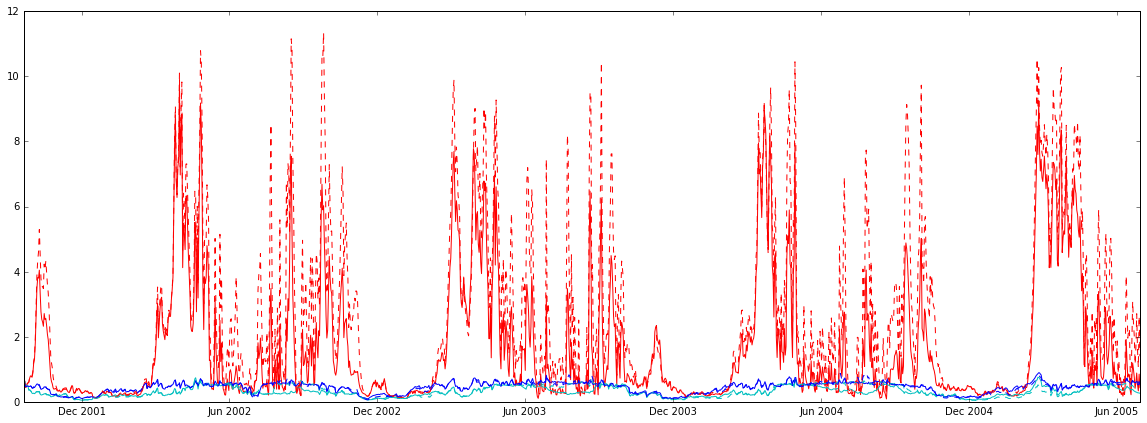

In [9]:
fig, axs = plt.subplots(1,1,figsize=(20,7))
pl0=axs.plot(mtimes,DiatBase[0,:],color='r')
pl0=axs.plot(mtimes,MyriBase[0,:],color='c')
pl0=axs.plot(mtimes,NanoBase[0,:],color='b')
pl0=axs.plot(mtimes2,DiatOff[0,:],'r--')
pl0=axs.plot(mtimes2,MyriOff[0,:],'c--')
pl0=axs.plot(mtimes2,NanoOff[0,:],'b--')


In [10]:
test=np.interp([time.mktime(d.timetuple()) for d in dates],[time.mktime(d.timetuple()) for d in mtimes],DiatBase[0,:]) # times is model

In [11]:
test2=np.interp([time.mktime(d.timetuple()) for d in dates],[time.mktime(d.timetuple()) for d in mtimes],DiatOff[0,:]) # times is model

1326.82780497
1197.94237656


(0, 30)

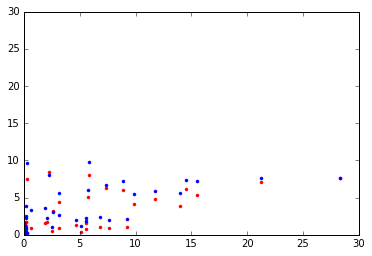

In [12]:
plt.plot(dia,test,'r.')
plt.plot(dia,test2,'b.')
print(np.sum((test-dia)*(test-dia)))
print(np.sum((test2-dia)*(test2-dia)))
plt.xlim((0,30))
plt.ylim((0,30))

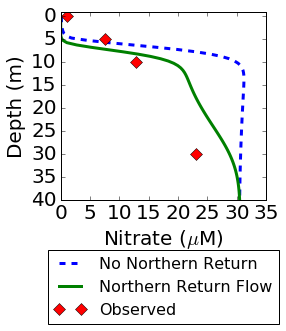

In [13]:

fig=plt.figure(figsize=(4.0, 4.5)) # in inches!
ax = plt.subplot(111)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0+.1*pos1.height, pos1.y0+.35*pos1.width,  pos1.width*.92, pos1.height*.75] 
ax.set_position(pos2) # set a new position
ax.plot(nitrateOff[:,994],z,'--',lw=3, label='No Northern Return')
plt.plot(nitrateBase[:,994],z,lw=3,label='Northern Return Flow')
# data below from Stratogem2004_07,10.xls, rows 45-48
ax.plot([1.042,7.495,12.879,23.13],[0,5,10,30],'rD',ms=8,label='Observed')
ax.invert_yaxis()
ax.set_xlabel('Nitrate ($\mu$M)',size=20)
ax.set_ylim((40,-1))
ax.set_ylabel('Depth (m)',size=20)
plt.legend(fontsize=16,loc=8,bbox_to_anchor=(.5, -.7))#, borderaxespad=0.)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('/home/eolson/pyCode/notebooks/figs/NRetNitrate.png')

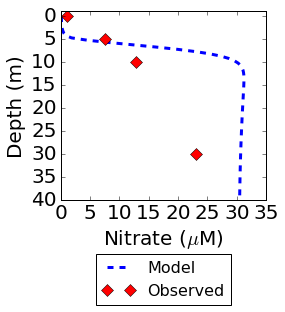

In [14]:
fig=plt.figure(figsize=(4.0, 4.5)) # in inches!
ax = plt.subplot(111)
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0+.1*pos1.height, pos1.y0+.35*pos1.width,  pos1.width*.92, pos1.height*.75] 
ax.set_position(pos2) # set a new position
ax.plot(nitrateOff[:,994],z,'--',lw=3, label='Model')
# data below from Stratogem2004_07,10.xls, rows 45-48
ax.plot([1.042,7.495,12.879,23.13],[0,5,10,30],'rD',ms=8,label='Observed')
ax.invert_yaxis()
ax.set_xlabel('Nitrate ($\mu$M)',size=20)
ax.set_ylim((40,-1))
ax.set_ylabel('Depth (m)',size=20)
plt.legend(fontsize=16,loc=8,bbox_to_anchor=(.5, -.6))#, borderaxespad=0.)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('/home/eolson/pyCode/notebooks/figs/NoNRetNitrate.png')

In [15]:
print(nitrateOff.shape)

(82, 1379)


In [16]:
print(mtimes[293])
print(dates[3])
print(mtimes[994])
print(dates[33])

2002-07-10 12:00:00+00:00
2002-07-10 00:00:00
2004-06-10 12:00:00+00:00
2004-06-07 00:00:00


In [17]:
print(no3[3])

2.75


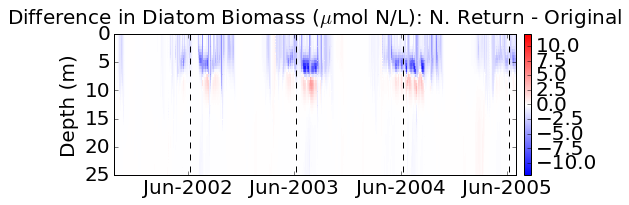

In [18]:
plt.figure(num=None, figsize=(9, 2.8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
#tt,tz=np.meshgrid(mtimes,z[:])
mesh0=ax.pcolormesh(mtimes,z,DiatBase-DiatOff,cmap='bwr',vmin=-12, vmax=12)
#cb0=plt.colorbar(mesh0,ax=axs[0])
ax.invert_yaxis()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-.05*pos1.height,  pos1.width, pos1.height] 
ax.set_position(pos2) # set a new position
cb=plt.colorbar(mesh0)
ax.set_ylabel('Depth (m)', fontsize=20)
ax.set_title('Difference in Diatom Biomass ($\mu$mol N/L): N. Return - Original',size=20,y=1.04)
#ax.autoscale(tight='True')
plt.xticks([dt.datetime(2002,6,1),dt.datetime(2003,6,1),dt.datetime(2004,6,1),\
           dt.datetime(2005,6,1)],size=20)
plt.yticks(size=20)
cb.ax.tick_params(labelsize=20)
ax.plot((dt.datetime(2002,6,7),dt.datetime(2002,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2003,6,7),dt.datetime(2003,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2004,6,7),dt.datetime(2004,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2005,6,7),dt.datetime(2005,6,7)),(0,40),'k--')
#ax.contour(mtimes,z,DiatBase,levels=[2],colors='dimgrey',label='2$\mu$M')#
#cb0.ax.tick_params(labelsize=16)
#fig.tight_layout()
#ax.annotate('2$\mu$M contour, N. Return', xy=(dt.datetime(2001,11,29), 20),size=18,color='dimgrey')
my=dts.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(my)
fig.autofmt_xdate()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0+pos1.width*.05, pos1.y0,  pos1.width, pos1.height*.9] 
ax.set_position(pos2) # set a new position
pos1 = cb.ax.get_position() # get the original position 
pos2 = [pos1.x0+pos1.width*.05, pos1.y0,  pos1.width, pos1.height*.9] 
cb.ax.set_position(pos2) # set a new position
ax.set_ylim((25,0))
plt.savefig('/home/eolson/pyCode/notebooks/figs/diatomDiff.png')

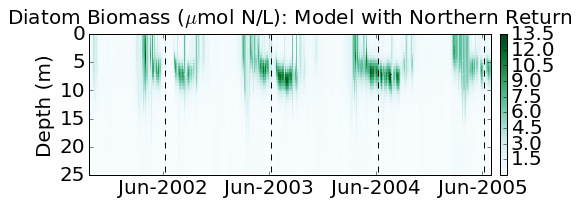

In [19]:
plt.figure(num=None, figsize=(9, 2.8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
#tt,tz=np.meshgrid(mtimes,z[:])
mesh0=ax.pcolormesh(mtimes,z,DiatBase,cmap='BuGn')
#cb0=plt.colorbar(mesh0,ax=axs[0])
ax.invert_yaxis()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0-.05*pos1.height,  pos1.width, pos1.height] 
ax.set_position(pos2) # set a new position
cb=plt.colorbar(mesh0)
ax.set_ylabel('Depth (m)', fontsize=20)
ax.set_title('Diatom Biomass ($\mu$mol N/L): Model with Northern Return',size=20,y=1.04)
#ax.autoscale(tight='True')
plt.xticks([dt.datetime(2002,6,1),dt.datetime(2003,6,1),dt.datetime(2004,6,1),\
           dt.datetime(2005,6,1)],size=20)
plt.yticks(size=20)
cb.ax.tick_params(labelsize=20)
ax.plot((dt.datetime(2002,6,7),dt.datetime(2002,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2003,6,7),dt.datetime(2003,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2004,6,7),dt.datetime(2004,6,7)),(0,40),'k--')
ax.plot((dt.datetime(2005,6,7),dt.datetime(2005,6,7)),(0,40),'k--')
#ax.contour(mtimes,z,DiatBase,levels=[2],colors='dimgrey',label='2$\mu$M')#
#cb0.ax.tick_params(labelsize=16)
#fig.tight_layout()
#ax.annotate('2$\mu$M contour, N. Return', xy=(dt.datetime(2001,11,29), 20),size=18,color='dimgrey')
my=dts.DateFormatter('%b-%Y')
ax.xaxis.set_major_formatter(my)
fig.autofmt_xdate()
pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0+pos1.width*.05, pos1.y0,  pos1.width, pos1.height*.9] 
ax.set_position(pos2) # set a new position
pos1 = cb.ax.get_position() # get the original position 
pos2 = [pos1.x0+pos1.width*.05, pos1.y0,  pos1.width, pos1.height*.9] 
cb.ax.set_position(pos2) # set a new position
ax.set_ylim((25,0))
plt.savefig('/home/eolson/pyCode/notebooks/figs/diatomNRet.png')

In [20]:
print(mtimes[994])

2004-06-10 12:00:00+00:00
